In [4]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in CSV that has data for modeling
df = pd.read_csv("lyrics.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Unnamed: 0,genre,artist,song,lyrics,wordcount,nostopwordcount,positivewordcount,positivepercents,negativewordcount,negativepercents,neutralwordcount,neutralpercents
0,0,Christian,Glory Revealed,By His Wounds,glory revealed by his wounds he was pierced fo...,205,79,7,8.86,16,20.25,56,70.89
1,1,Christian,Caedmon's Call,God of Wonders,lord of heaven and earth lord of all creation ...,217,116,39,33.62,2,1.72,75,64.66
2,2,Christian,MercyMe,I Can Only Imagine,i can only imagine what it will be like when i...,275,89,7,7.87,3,3.37,79,88.76
3,3,Christian,Aaron Shust,My Savior My God,i am not skilled to understand what god has wi...,371,173,39,22.54,9,5.20,125,72.25
4,4,Christian,Michael W. Smith,Breathe,this is the air i breathe this is the air i br...,198,92,3,3.26,23,25.00,66,71.74


In [18]:
# Set features. This will also be used as your x values.
X = df[['wordcount','nostopwordcount','positivewordcount','positivepercents','negativewordcount','negativepercents','neutralwordcount','neutralpercents']]
# Choosing data that will be used for Y value
y = df['genre']
df_group = df.groupby('genre')

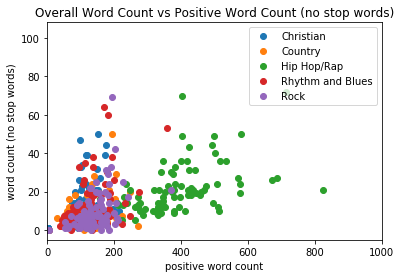

In [75]:
for name, group in df_group:    
    plt.plot(group['nostopwordcount'],group['positivewordcount'],marker = "o", linestyle="", label = name)
plt.legend()
plt.xlim (0,1000)
plt.title('Overall Word Count vs Positive Word Count (no stop words)')
plt.ylabel("word count (no stop words)")
plt.xlabel("positive word count")
plt.savefig('static/countbypositive.png')

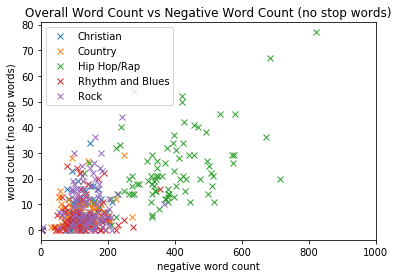

In [76]:
for name, group in df_group:   
    plt.plot(group['nostopwordcount'],group['negativewordcount'],marker = "x", linestyle="", label = name)
plt.legend()
plt.xlim (0,1000)
plt.title('Overall Word Count vs Negative Word Count (no stop words)')
plt.ylabel("word count (no stop words)")
plt.xlabel("negative word count")
plt.savefig('static/countbynegative.png')

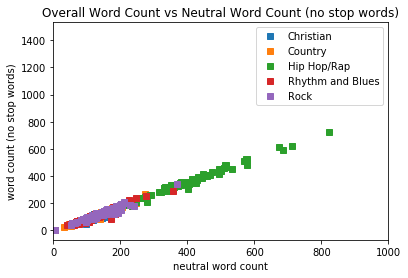

In [77]:
for name, group in df_group: 
    plt.plot(group['nostopwordcount'],group['neutralwordcount'],marker = "s", linestyle="", label = name)
plt.legend()
plt.xlim (0,1000)
plt.title('Overall Word Count vs Neutral Word Count (no stop words)')
plt.ylabel("word count (no stop words)")
plt.xlabel("neutral word count")
plt.savefig('static/countbyneutral.png')

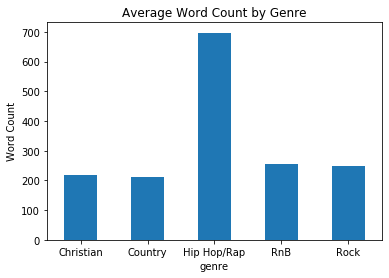

In [78]:
word_count = df_group['wordcount'].mean().plot.bar(rot=0)
word_count.set_ylabel("Word Count")
word_count.set_title("Average Word Count by Genre")
word_count.set_xticklabels(['Christian','Country','Hip Hop/Rap', "RnB","Rock"])
fig = word_count.get_figure()
fig.savefig('static/averagewordcount.png')
